1. Importation des librairies et du dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.feature_extraction.text import TfidfVectorizer


2. Chargement  des données

In [11]:
df = pd.read_csv("../donnees/TMDB_5000_movies.csv")


In [12]:
columns = df.columns.tolist()

In [14]:
columns

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count']

In [15]:
#nombre de lignes et de colonnes
shape = df.shape
shape


(4803, 20)

Le nombre de langue dans le dataset

In [16]:
# Langues distinctes dans original_language
langues_originales = df['original_language'].unique()
print("Langues distinctes dans original_language :", langues_originales)
nb_langues = df['original_language'].nunique()
print(f"Nombre de langues distinctes dans original_language : {nb_langues}")



Langues distinctes dans original_language : ['en' 'ja' 'fr' 'zh' 'es' 'de' 'hi' 'ru' 'ko' 'te' 'cn' 'it' 'nl' 'ta'
 'sv' 'th' 'da' 'xx' 'hu' 'cs' 'pt' 'is' 'tr' 'nb' 'af' 'pl' 'he' 'ar'
 'vi' 'ky' 'id' 'ro' 'fa' 'no' 'sl' 'ps' 'el']
Nombre de langues distinctes dans original_language : 37


Analyse exploratoire du dataset TMDB

In [17]:
#1. aperçu des données
print(f"Nombre de films : {len(df)}")
print(df.info())
print(df.describe())

Nombre de films : 4803
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15

In [18]:
#2. Statistiques descriptives des variables numériques
print(df[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']].describe())


             budget   popularity       revenue      runtime  vote_average  \
count  4.803000e+03  4803.000000  4.803000e+03  4801.000000   4803.000000   
mean   2.904504e+07    21.492301  8.226064e+07   106.875859      6.092172   
std    4.072239e+07    31.816650  1.628571e+08    22.611935      1.194612   
min    0.000000e+00     0.000000  0.000000e+00     0.000000      0.000000   
25%    7.900000e+05     4.668070  0.000000e+00    94.000000      5.600000   
50%    1.500000e+07    12.921594  1.917000e+07   103.000000      6.200000   
75%    4.000000e+07    28.313505  9.291719e+07   118.000000      6.800000   
max    3.800000e+08   875.581305  2.787965e+09   338.000000     10.000000   

         vote_count  
count   4803.000000  
mean     690.217989  
std     1234.585891  
min        0.000000  
25%       54.000000  
50%      235.000000  
75%      737.000000  
max    13752.000000  


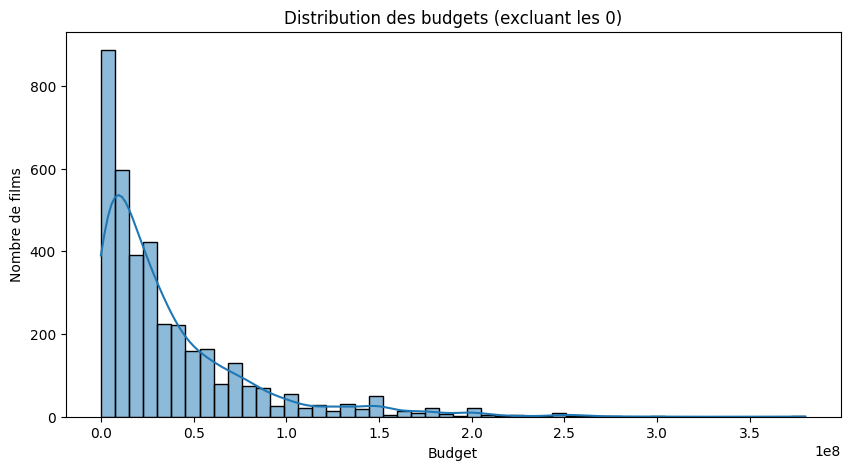

In [19]:
#3. Visualisation des distributions
#3.1 Distribution du budget
plt.figure(figsize=(10,5))
sns.histplot(df['budget'].replace(0, pd.NA).dropna(), bins=50, kde=True)
plt.title("Distribution des budgets (excluant les 0)")
plt.xlabel("Budget")
plt.ylabel("Nombre de films")
plt.show()


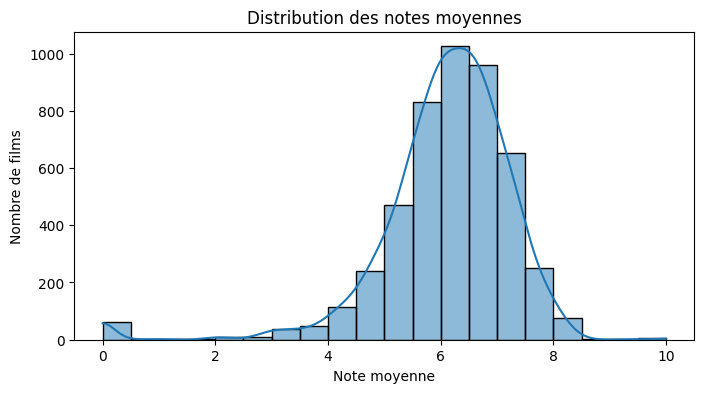

In [20]:
#3.2 Distribution des notes moyennes
plt.figure(figsize=(8,4))
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.title("Distribution des notes moyennes")
plt.xlabel("Note moyenne")
plt.ylabel("Nombre de films")
plt.show()


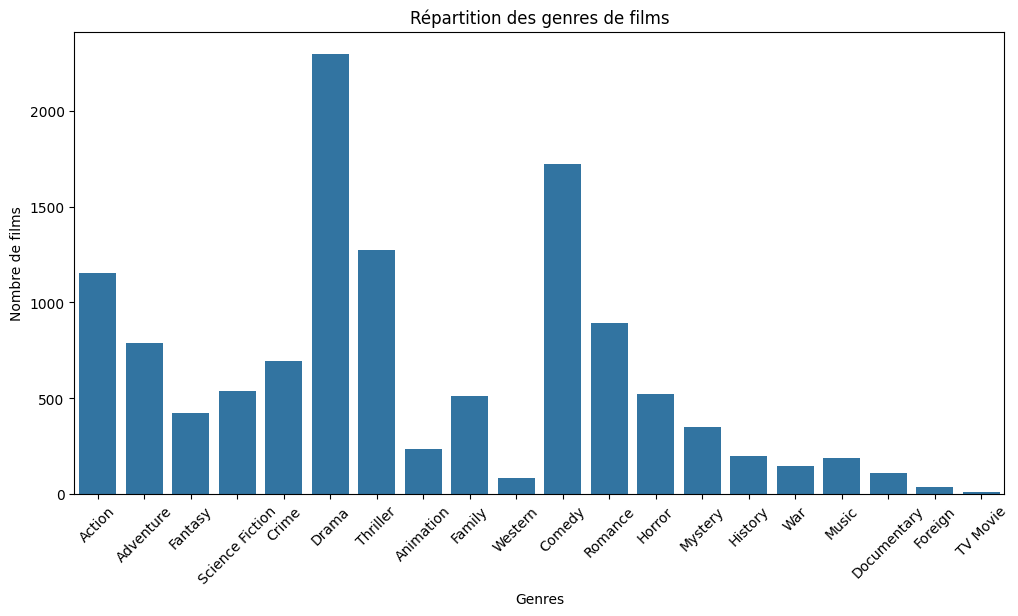

In [21]:
#3. Extraction et analyse des genres
# Parsing des genres JSON
df['genres_list'] = df['genres'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)] if pd.notnull(x) else [])

# Comptage total des genres
from collections import Counter
all_genres = [genre for sublist in df['genres_list'] for genre in sublist]
genre_counts = Counter(all_genres)

# Affichage des genres les plus fréquents
plt.figure(figsize=(12,6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.xticks(rotation=45)
plt.title("Répartition des genres de films")
plt.xlabel("Genres")
plt.ylabel("Nombre de films")
plt.show()


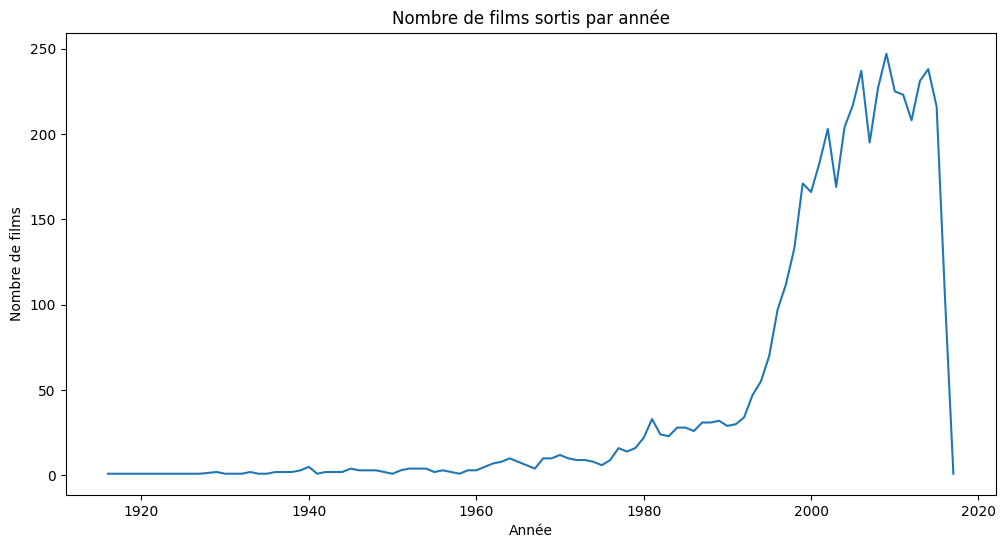

In [22]:
#5. Analyse des sorties par année
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

movies_per_year = df.groupby('release_year').size()
plt.figure(figsize=(12,6))
movies_per_year.plot()
plt.title('Nombre de films sortis par année')
plt.xlabel('Année')
plt.ylabel('Nombre de films')
plt.show()


Nettoyage des données (valeurs manquantes, doublons)

2. Gestion des valeurs manquantes

a. Variables numériques (budget, revenue, runtime)

In [23]:
from sklearn.impute import SimpleImputer

# Remplacement des valeurs 0 par NaN pour les colonnes numériques

df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)
df['runtime'] = df['runtime'].replace(0, np.nan)

imputer = SimpleImputer(strategy='median')

# Imputation des valeurs manquantes
df[['budget', 'revenue', 'runtime']] = imputer.fit_transform(df[['budget', 'revenue', 'runtime']])

b. Variables textuelles (overview, genres)

In [24]:
avant = len(df)
df = df.dropna(subset=['overview'])
apres = len(df)
print(f"Lignes sans synopsis supprimées : {avant - apres}")


Lignes sans synopsis supprimées : 3


3. Vérification finale du nettoyage

In [25]:
print("Valeurs manquantes après nettoyage :")
print(df.isnull().sum())


Valeurs manquantes après nettoyage :
budget                     0
genres                     0
homepage                3088
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  841
title                      0
vote_average               0
vote_count                 0
genres_list                0
release_year               1
dtype: int64


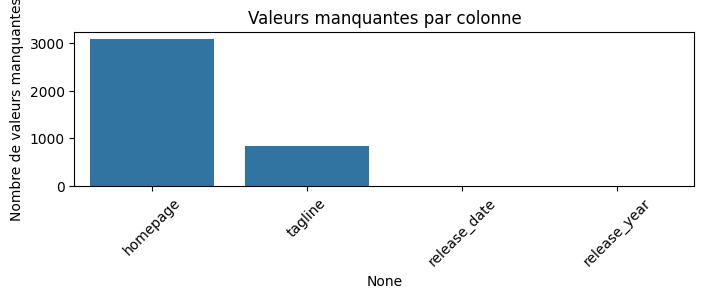

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
plt.figure(figsize=(8,2))
sns.barplot(x=missing.index, y=missing.values)
plt.title('Valeurs manquantes par colonne')
plt.xticks(rotation=45)
plt.ylabel('Nombre de valeurs manquantes')
plt.show()


Prétraitement textuel des synopsis (nettoyage, tokenization, suppression stop words)


 Importation des librairies necessaires

In [27]:
import re
import nltk
from nltk.tokenize import word_tokenize
import stopwordsiso as stopwords
import sys

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\stopwordsiso\_core.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


1. Nettoyage du texte

In [28]:
def nettoyage_texte(texte):
    
    if not isinstance(texte, str) or pd.isna(texte):
        return ''
    texte = texte.lower()
    texte = re.sub(r'[^a-zàâçéèêëîïôûùüÿñæœ\s]', '', texte)
    return texte

2. La tokenization

In [29]:
def tokenization_texte(texte):
    
    return word_tokenize(texte)

3. Suppression stop words

In [30]:
def suppression_stopwords(tokens, langue):
   
    if langue and stopwords.has_lang(langue):
        stop_words = stopwords.stopwords(langue)
    else:
        stop_words = set()
    return [mot for mot in tokens if mot not in stop_words]

4. Pretraitement

In [31]:
def pretraitement_complet(texte, langue):
    
    if not isinstance(texte, str) or not texte.strip():
        return ''
    texte_nettoye = nettoyage_texte(texte)
    tokens = tokenization_texte(texte_nettoye)
    tokens_filtrés = suppression_stopwords(tokens, langue)
    return ' '.join(tokens_filtrés)

Fonction de détection de langue

In [32]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException


def detecter_langue_texte(texte):
    try:
        return detect(texte)
    except LangDetectException:
        return None


In [74]:
from deep_translator import GoogleTranslator
from tqdm import tqdm

In [75]:
# Fonction de traduction avec gestion d’erreur et barre de progression
def traduire_texte(texte):
    try:
        if pd.isna(texte) or texte.strip() == '':
            return ''
        return GoogleTranslator(source='auto', target='fr').translate(texte)
    except Exception as e:
        print(f"Erreur de traduction pour : {texte[:30]}... : {e}")
        return ''
tqdm.pandas()
df['overview_fr'] = df['overview'].progress_apply(traduire_texte)

 33%|███▎      | 1607/4800 [51:57<187:47:20, 211.73s/it]

Erreur de traduction pour : Five college friends spend the... : HTTPSConnectionPool(host='translate.google.com', port=443): Max retries exceeded with url: /m?tl=fr&sl=auto&q=Five+college+friends+spend+the+weekend+at+a+remote+cabin+in+the+woods%2C+where+they+get+more+than+they+bargained+for.+Together%2C+they+must+discover+the+truth+behind+the+cabin+in+the+woods. (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1028)')))


 40%|████      | 1944/4800 [1:04:39<59:01:29, 74.40s/it]

Erreur de traduction pour : An original story featuring pe... : HTTPSConnectionPool(host='translate.google.com', port=443): Max retries exceeded with url: /m?tl=fr&sl=auto&q=An+original+story+featuring+performances+by+Cirque+du+Soleil.+A+young+woman+is+entranced+by+an+Aerialist.+When+they+fall+into+the+dreamlike+world+of+Cirque+du+Soleil+and+are+separated%2C+they+travel+through+the+different+tent+worlds+trying+to+find+each+other. (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1028)')))


 47%|████▋     | 2237/4800 [1:14:31<12:51:28, 18.06s/it]

Erreur de traduction pour : An undercover cop in a not-too... : ('Connection aborted.', ConnectionAbortedError(10053, 'Une connexion établie a été abandonnée par un logiciel de votre ordinateur hôte', None, 10053, None))


 78%|███████▊  | 3766/4800 [2:06:11<3:18:31, 11.52s/it] 

Erreur de traduction pour : As Nell Sweetzer tries to buil... : ("Connection broken: ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None)", ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
Erreur de traduction pour : The film tells a story of a di... : HTTPSConnectionPool(host='translate.google.com', port=443): Max retries exceeded with url: /m?tl=fr&sl=auto&q=The+film+tells+a+story+of+a+divorced+couple+trying+to+raise+their+young+son.+The+story+follows+the+boy+for+twelve+years%2C+from+first+grade+at+age+6+through+12th+grade+at+age+17-18%2C+and+examines+his+relationship+with+his+parents+as+he+grows. (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002AA3534F9D0>: Failed to resolve 'translate.google.com' ([Errno 11001] getaddrinfo failed)"))
Erreur de traduction pour : An American journalism student... : HTTPSConnectionPool(host='transl

 81%|████████  | 3877/4800 [2:10:28<1:06:10,  4.30s/it]

Erreur de traduction pour : Cidade de Deus is a shantytown... : ("Connection broken: ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None)", ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
Erreur de traduction pour : All that exists now is clubs, ... : HTTPSConnectionPool(host='translate.google.com', port=443): Max retries exceeded with url: /m?tl=fr&sl=auto&q=All+that+exists+now+is+clubs%2C+drugs%2C+pubs+and+parties.+I%27ve+got+48+hours+off+from+the+world%2C+man+I%27m+gonna+blow+steam+out+of+my+head+like+a+screaming+kettle.+I%27m+gonna+talk+cods+hit+to+strangers+all+night.+I%27m+gonna+lose+the+plot+on+the+dance+floor%2C+the+free+radicals+inside+me+are+freaking+man%21++Tonight+I%27m+Jip+Travolta%2C+I%27m+Peter+Popper%2C+I%27m+going+to+Never+Never+Land+with+my+chosen+family%2C+man.+We%27re+going+to+get+more+spaced+out+than+Neil+Armstrong+ever+did.++Anything+could+happen

 92%|█████████▏| 4426/4800 [2:28:39<1:39:12, 15.91s/it]

Erreur de traduction pour : Zombie Hunter is set in a post... : ('Connection aborted.', ConnectionResetError(10054, 'Une connexion existante a dû être fermée par l’hôte distant', None, 10054, None))
Erreur de traduction pour : A Fine Step is an uplifting fa... : HTTPSConnectionPool(host='translate.google.com', port=443): Max retries exceeded with url: /m?tl=fr&sl=auto&q=A+Fine+Step+is+an+uplifting+family+drama+centering+on+Cal+Masterson+%28Luke+Perry%2C+Beverly+Hills+90210%29+an+award+winning+horseman+whose+relationship+with+his+beloved+horse+Fandango+allows+him+to+achieve+multiple+championship+wins.+However+tragedy+strikes+when+Cal+and+Fandango+are+involved+in+a+serious+accident%2C+ending+Cal%27s+horse+riding+days+forever.+Cal%27s+devastation+is+slowly+overcome+when+his+new+neighbour%2C+14+year+old+Claire+Mason+%28Anna+Claire+Sneed%2C+Glee%29+takes+an+interest+in+Fandango+and+convinces+him+that+Fandango%27s+competing+days+might+not+be+over. (Caused by NameResolutionError("<urllib3.con

100%|██████████| 4800/4800 [2:40:07<00:00,  2.00s/it]  


Détection de la langue du synopsis

In [76]:
df['langue_detectee'] = df['overview_fr'].apply(detecter_langue_texte)

Identification des lignes où la langue détectée diffère de original_language

In [77]:
df['langue_differe'] = df.apply(
    lambda row: row['langue_detectee'] != row['original_language'] if pd.notnull(row['langue_detectee']) else False,
    axis=1
)

Affichage de conflit de langue

In [78]:
print("Différences entre original_language et langue détectée dans le synopsis :")
print(df[df['langue_differe']][['original_language', 'langue_detectee', 'overview_fr']])

Différences entre original_language et langue détectée dans le synopsis :
     original_language langue_detectee  \
0                   en              fr   
1                   en              fr   
2                   en              fr   
3                   en              fr   
4                   en              fr   
...                ...             ...   
4798                es              fr   
4799                en              fr   
4800                en              fr   
4801                en              fr   
4802                en              fr   

                                            overview_fr  
0     Au 22e siècle, une marine paraplégique est env...  
1     Le capitaine Barbossa, qui serait mort, est re...  
2     Un message cryptique du passé de Bond lui envo...  
3     Après la mort du procureur de district, Harvey...  
4     John Carter est un ancien capitaine militaire ...  
...                                                 ...  
4798  El Mariac

ajout colonne langue effective pour le prétraitement :

In [79]:
df['langue_effective'] = df.apply(
    lambda row: row['langue_detectee'] if pd.notnull(row['langue_detectee']) else row['original_language'],
    axis=1
)

4. Application du prétraitement complet sur chaque synopsis

In [80]:
df['synopsis_nettoye'] = df.apply(
    lambda row: pretraitement_complet(row['overview_fr'], row['langue_effective']),
    axis=1
)

In [81]:
print(df[['original_language', 'langue_detectee', 'langue_effective', 'overview_fr', 'synopsis_nettoye']].head(5))

  original_language langue_detectee langue_effective  \
0                en              fr               fr   
1                en              fr               fr   
2                en              fr               fr   
3                en              fr               fr   
4                en              fr               fr   

                                         overview_fr  \
0  Au 22e siècle, une marine paraplégique est env...   
1  Le capitaine Barbossa, qui serait mort, est re...   
2  Un message cryptique du passé de Bond lui envo...   
3  Après la mort du procureur de district, Harvey...   
4  John Carter est un ancien capitaine militaire ...   

                                    synopsis_nettoye  
0  siècle marine paraplégique envoyée pandore lun...  
1  capitaine barbossa mort revenu vie dirige bord...  
2  message cryptique bond envoie piste découvrir ...  
3  mort procureur district harvey dent batman ass...  
4  john carter ancien capitaine militaire guerre ..

In [82]:
print(df.loc[4000:4007, ['original_language', 'langue_detectee', 'langue_effective', 'overview_fr', 'synopsis_nettoye']])

     original_language langue_detectee langue_effective  \
4000                en              fr               fr   
4001                en              fr               fr   
4002                en              fr               fr   
4003                es              fr               fr   
4004                zh              fr               fr   
4005                en              fr               fr   
4006                en              fr               fr   
4007                en              fr               fr   

                                            overview_fr  \
4000  Après que son amant l'ait rejeté, un jeune hom...   
4001  Un slacker au chômage (Lange) inspire ses coéq...   
4002  Riding Giants est une histoire de surfeurs de ...   
4003  Un homme pénètre accidentellement dans une mac...   
4004  Une histoire d'action-aventure s'est concentré...   
4005  Un week-end de camping dans les montagnes devi...   
4006  En 1927, Hollywood, Don Lockwood et Lina Lamon...

Sauvegarde de la colonne 'synopsis_nettoye' dans un fichier texte

In [83]:
chemin_fichier = "../donnees/corpus_synopsis.txt"

with open(chemin_fichier, 'w', encoding='utf-8') as fichier:
    for texte in df['synopsis_nettoye'].fillna(''):
        fichier.write(texte + '\n')
        
print(f"Corpus sauvegardé dans {chemin_fichier}")


Corpus sauvegardé dans ../donnees/corpus_synopsis.txt


Vectorisation textuelle (TF-IDF ou embeddings)


Vectorisation TF-IDF

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
def vectoriser_tf_idf(corpus, max_termes=5000):
    vectoriseur = TfidfVectorizer(max_features=max_termes)
    matrice_tfidf = vectoriseur.fit_transform(corpus)
    print(f"TF-IDF : matrice de forme {matrice_tfidf.shape}")
    return matrice_tfidf, vectoriseur

In [86]:
with open("../donnees/corpus_synopsis.txt", 'r', encoding='utf-8') as f:
    corpus = f.read().splitlines()

In [87]:
matrice_tfidf, vectoriseur = vectoriser_tf_idf(corpus)

TF-IDF : matrice de forme (4800, 5000)


In [88]:
# Conversion en DataFrame pandas pour affichage
df_tfidf = pd.DataFrame(matrice_tfidf.toarray(), columns=vectoriseur.get_feature_names_out())


In [89]:
# Affichage des premières lignes
print(df_tfidf.head())

   aaron  abandonne  abandonner  abandonné  abandonnée  abattu  abri  abrite  \
0    0.0        0.0         0.0        0.0         0.0     0.0   0.0     0.0   
1    0.0        0.0         0.0        0.0         0.0     0.0   0.0     0.0   
2    0.0        0.0         0.0        0.0         0.0     0.0   0.0     0.0   
3    0.0        0.0         0.0        0.0         0.0     0.0   0.0     0.0   
4    0.0        0.0         0.0        0.0         0.0     0.0   0.0     0.0   

   absence  abusif  ...  éveillé  éventuelle  éviter  évolution  événement  \
0      0.0     0.0  ...      0.0         0.0     0.0        0.0        0.0   
1      0.0     0.0  ...      0.0         0.0     0.0        0.0        0.0   
2      0.0     0.0  ...      0.0         0.0     0.0        0.0        0.0   
3      0.0     0.0  ...      0.0         0.0     0.0        0.0        0.0   
4      0.0     0.0  ...      0.0         0.0     0.0        0.0        0.0   

   événements  êtres  île  œil  œuvres  
0        

In [93]:
# Pour voir les termes les plus représentatifs dans un document spécifique,
# par exemple le 0, trier les colonnes par ordre décroissant de poids TF-IDF
print(df_tfidf.loc[0].sort_values(ascending=False).head(10))

civilisation      0.381456
ordres            0.376767
marine            0.357998
envoyée           0.354917
protection        0.349240
extraterrestre    0.302062
lune              0.285724
siècle            0.277299
mission           0.240303
dune              0.170060
Name: 0, dtype: float64
